In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import interpolate
import scipy
from scipy import ndimage

In [23]:
ASCIIFILE = 'GPTrelated/trans.txt'
MConHBAR  =  2.59e12
maxsig = 1  # determine how many standard deviations are we going to plot

## Directly calculate emittance from defination

In [37]:
np.squeeze([plot_min,x,y])

array([-0.0001165,
       array([ 9.371e-06,  4.578e-05,  4.704e-05, -4.227e-05, -4.595e-05,
              -4.575e-05, -2.171e-05,  1.313e-05,  1.485e-05, -4.026e-07]),
       array([ 1.623e-05,  7.930e-05,  8.146e-05, -4.335e-05, -7.930e-05,
              -7.895e-05, -2.719e-05,  2.904e-05,  3.284e-05,  3.628e-05])],
      dtype=object)

xmin-0.0001378,16008
xmax0.0001383,16008
ymax0.000123,16008
ymin-0.0001528,32014
ymax0.0001426,32014
xmin-0.0001853,48020
xmax0.000161,48020
ymin-0.000161,80032
ymax0.000173,80032
ymin-0.0001853,112044
ymax0.0001817,112044
xmin-0.0001965,208080
xmax0.0001714,208080
xmin-0.0001975,240092
xmax0.0001778,240092
ymin-0.0001862,432164
xmax0.0001782,496188
ymin-0.0001994,752284


Text(0.6199999999999999, -271.48, 'HP2')

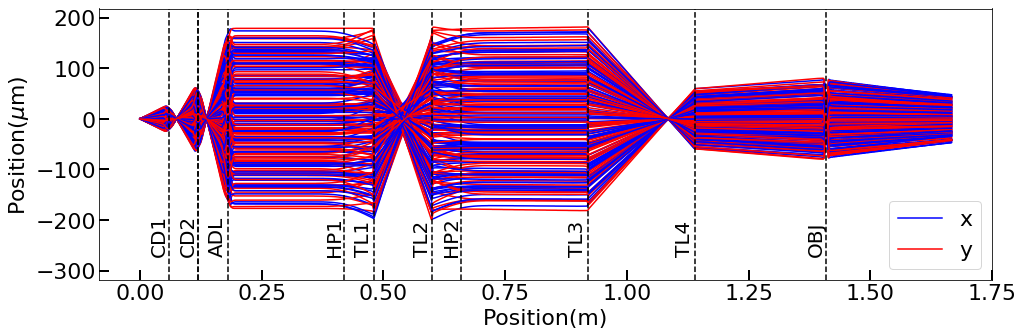

In [178]:
# Read the first particle:
screen =  np.loadtxt(ASCIIFILE, skiprows=2, max_rows = 8000)
x  = screen[:,0]
y  = screen[:,1]
z  = screen[:,2]
xmin_row = 2
xmax_row = 2
ymin_row = 2
ymax_row = 2

# fig = plt.figure(figsize=[16,5])
fig, ax = plt.subplots(1, figsize = [16,5])
plt.plot(z-z[0],x*1e6,c = 'B', label='x')
plt.plot(z-z[0],y*1e6,c = 'R', label='y')
x_min = np.amin(x)
y_min = np.amin(y)
x_max = np.amax(x)
y_max = np.amax(y)



# set up a row index and read the rest
row_index = 8005
while row_index < 800000:
    screen = np.loadtxt(ASCIIFILE, skiprows = row_index, max_rows = 8000)
    x  = screen[:,0]
    y  = screen[:,1]
    z  = screen[:,2]
    plt.plot(z-z[0],x*1e6, c='B')
    plt.plot(z-z[0],y*1e6, C='R')
    
    if np.amin(x) < x_min:
        x_min = np.amin(x)
        x_min_row = row_index
        print('xmin' + str(x_min) + ',' + str(row_index))
        
    if np.amax(x) > x_max:
        x_max = np.amax(x)
        x_max_row = row_index
        print('xmax' + str(x_max) + ',' + str(row_index))
        
    if np.amin(y) < y_min:
        y_min = np.amin(y)
        y_min_row = row_index
        print('ymin' + str(y_min) + ',' + str(row_index))
        
    if np.amax(y) > y_max:
        y_max = np.amax(y)
        y_max_row = row_index
        print('ymax' + str(y_max) + ',' + str(row_index))

    row_index = row_index + 8003
    
plt.ylim([min(x_min,y_min)*1.6e6, max(x_max, y_max)*1.2e6])
plt.ylabel('Position($\mu$m)', fontsize = 22)
plt.xlabel('Position(m)', fontsize = 22)
plt.tick_params(which='major',direction = 'in', length = 10, width = 2)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22)

# Mark all the components with vertical lines
plt.axvline(x=-36e-2-z[0], color='black', linestyle='dashed') # sol1
ax.text(-36e-2-z[0]-0.04, plot_min * 1.6e6 + 25, 'CD1', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x=-30e-2-z[0], color='black', linestyle='dashed') # sol2
ax.text(-30e-2-z[0]-0.04, plot_min * 1.6e6 + 25, 'CD2', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x=-24e-2-z[0], color='black', linestyle='dashed') # solt
ax.text(-24e-2-z[0]-0.04, plot_min * 1.6e6 + 25, 'ADL', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.99-z[0], color='black', linestyle='dashed') # sol3
ax.text(0.99-z[0]-0.04, plot_min * 1.6e6 + 25, 'OBJ', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x=-30e-2-z[0], color='black', linestyle='dashed') # sol0, same position as sol2?

# sol 4 is not being used
# plt.axvline(x= 120e-2-z[0], color='black', linestyle='dashed') # sol4
# ax.text(120e-2-z[0]-0.04, plot_min * 1.6e6 + 25, 'Sol4', rotation=90, va='bottom', fontsize = 20)

# Four transfer lenses
plt.axvline(x= 0.06-z[0], color='black', linestyle='dashed') # csol1
ax.text(0.06-z[0]-0.04, plot_min * 1.6e6 + 25, 'TL1', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.18-z[0], color='black', linestyle='dashed') # csol2
ax.text(0.18-z[0]-0.04, plot_min * 1.6e6 + 25, 'TL2', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.5-z[0], color='black', linestyle='dashed') # csol3
ax.text(0.5-z[0]-0.04, plot_min * 1.6e6 + 25, 'TL3', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.72-z[0], color='black', linestyle='dashed') # csol4
ax.text(0.72-z[0]-0.04, plot_min * 1.6e6 + 25, 'TL4', rotation=90, va='bottom', fontsize = 20)

# Two hexapole components
plt.axvline(x= 0-z[0], color='black', linestyle='dashed') # hex1
ax.text(0.0-z[0]-0.04, plot_min * 1.6e6 + 25, 'HP1', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.24-z[0], color='black', linestyle='dashed') # hex2
ax.text(0.24-z[0]-0.04, plot_min * 1.6e6 + 25, 'HP2', rotation=90, va='bottom', fontsize = 20)


In [173]:
print(y_min_row, y_max_row, x_min_row, x_max_row)

752284 112044 240092 496188


Text(0.6199999999999999, -271.48, 'HP2')

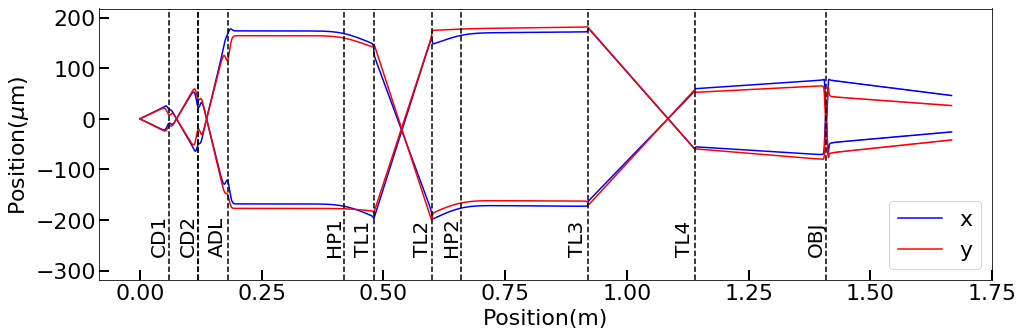

In [176]:
fig, ax = plt.subplots(1, figsize = [16,5])

# Read the first particle:
screen =  np.loadtxt(ASCIIFILE, skiprows=x_min_row, max_rows = 8000)
x  = screen[:,0]
y  = screen[:,1]
z  = screen[:,2]
plt.plot(z-z[0],x*1e6,c = 'B', label='x')
# plt.plot(z-z[0],y*1e6,c = 'R', label='y')

screen =  np.loadtxt(ASCIIFILE, skiprows=x_max_row, max_rows = 8000)
x  = screen[:,0]
y  = screen[:,1]
z  = screen[:,2]
plt.plot(z-z[0],x*1e6,c = 'B')
# plt.plot(z-z[0],y*1e6,c = 'R')

screen =  np.loadtxt(ASCIIFILE, skiprows=y_min_row, max_rows = 8000)
x  = screen[:,0]
y  = screen[:,1]
z  = screen[:,2]
# plt.plot(z-z[0],x*1e6,c = 'B')
plt.plot(z-z[0],y*1e6,c = 'R', label='y')

screen =  np.loadtxt(ASCIIFILE, skiprows=y_max_row, max_rows = 8000)
x  = screen[:,0]
y  = screen[:,1]
z  = screen[:,2]
# plt.plot(z-z[0],x*1e6,c = 'B')
plt.plot(z-z[0],y*1e6,c = 'R')

plt.ylim([min(x_min,y_min)*1.6e6, max(x_max, y_max)*1.2e6])
plt.ylabel('Position($\mu$m)', fontsize = 22)
plt.xlabel('Position(m)', fontsize = 22)
plt.tick_params(which='major',direction = 'in', length = 10, width = 2)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22)

# Mark all the components with vertical lines
plt.axvline(x=-36e-2-z[0], color='black', linestyle='dashed') # sol1
ax.text(-36e-2-z[0]-0.04, plot_min * 1.6e6 + 25, 'CD1', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x=-30e-2-z[0], color='black', linestyle='dashed') # sol2
ax.text(-30e-2-z[0]-0.04, plot_min * 1.6e6 + 25, 'CD2', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x=-24e-2-z[0], color='black', linestyle='dashed') # solt
ax.text(-24e-2-z[0]-0.04, plot_min * 1.6e6 + 25, 'ADL', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.99-z[0], color='black', linestyle='dashed') # sol3
ax.text(0.99-z[0]-0.04, plot_min * 1.6e6 + 25, 'OBJ', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x=-30e-2-z[0], color='black', linestyle='dashed') # sol0, same position as sol2?

# sol 4 is not being used
# plt.axvline(x= 120e-2-z[0], color='black', linestyle='dashed') # sol4
# ax.text(120e-2-z[0]-0.04, plot_min * 1.6e6 + 25, 'Sol4', rotation=90, va='bottom', fontsize = 20)

# Four transfer lenses
plt.axvline(x= 0.06-z[0], color='black', linestyle='dashed') # csol1
ax.text(0.06-z[0]-0.04, plot_min * 1.6e6 + 25, 'TL1', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.18-z[0], color='black', linestyle='dashed') # csol2
ax.text(0.18-z[0]-0.04, plot_min * 1.6e6 + 25, 'TL2', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.5-z[0], color='black', linestyle='dashed') # csol3
ax.text(0.5-z[0]-0.04, plot_min * 1.6e6 + 25, 'TL3', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.72-z[0], color='black', linestyle='dashed') # csol4
ax.text(0.72-z[0]-0.04, plot_min * 1.6e6 + 25, 'TL4', rotation=90, va='bottom', fontsize = 20)

# Two hexapole components
plt.axvline(x= 0-z[0], color='black', linestyle='dashed') # hex1
ax.text(0.0-z[0]-0.04, plot_min * 1.6e6 + 25, 'HP1', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.24-z[0], color='black', linestyle='dashed') # hex2
ax.text(0.24-z[0]-0.04, plot_min * 1.6e6 + 25, 'HP2', rotation=90, va='bottom', fontsize = 20)


In [43]:
plot_max

0.000161